In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Import libraries for OCR 
import cv2

In [104]:
image = cv2.imread('D:\\Intelliza_Projects\\TPL\\OCR\\meter_ocr\\streetlight_images\\test_images\\nashik\\photo_painted_num\\57.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

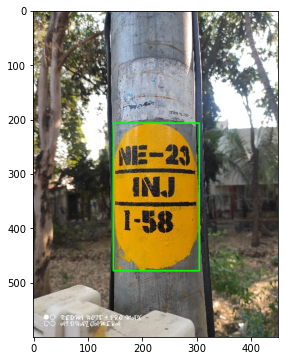

In [105]:
#rgb(129, 82, 13)
#rgb(209, 167, 6)

lower_red = np.array([120, 80, 0], np.uint8)
upper_red = np.array([210, 160, 10], np.uint8)
mask_red = cv2.inRange(image, lower_red, upper_red)
red = cv2.bitwise_and(image, image, mask=mask_red)

edges_red = cv2.Canny(red, 127, 255, apertureSize=3)

contours_red, hierarchy = cv2.findContours(edges_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


boxes_red = []
for contour in contours_red:
    x,y,w,h = cv2.boundingRect(contour)
    if cv2.contourArea(contour) < 5000:
        #cv2.rectangle(red, (x, y), (x + w, y + h), (0, 255, 0), 2)
        boxes_red.append([x,y, x+w,y+h])
        
boxes_red = np.asarray(boxes_red)
left = np.min(boxes_red[:,0])
top = np.min(boxes_red[:,1])
right = np.max(boxes_red[:,2])
bottom = np.max(boxes_red[:,3])


#cv2.rectangle(red, (left,top), (right,bottom), (0, 255, 0), 2)
cv2.rectangle(image, (left,top), (right,bottom), (0, 255, 0), 2)
    
plt.figure(figsize=(12,6))
plt.imshow(image)

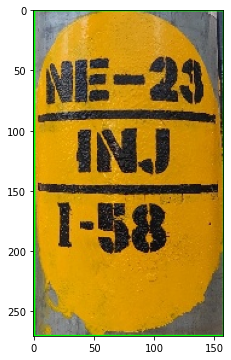

In [106]:
# Extract the image covering the pole number
extracted_image = image[top:bottom, left:right]

plt.figure(figsize=(12,6))
plt.imshow(extracted_image)